In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
df=pd.read_excel(r"C:\Users\drmat\OneDrive\Documents\Career Foundry\COVID_Suicide\02 Data\02 Prepared\Combined\ethnicity.xlsx",index_col=False)

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
df1=df[['covid_cases','suicide_deaths']]

In [7]:
def clean_dataset(df1):
    assert isinstance(df1, pd.DataFrame), "df needs to be a pd.DataFrame"
    df1.dropna(inplace=True)
    indices_to_keep = ~df1.isin([np.nan, np.inf, -np.inf]).any(1)
    return df1[indices_to_keep].astype(np.float64)

In [8]:
clean_dataset(df1)

C:\Users\drmat\AppData\Local\Temp\ipykernel_13360\2934779625.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


,covid_cases,suicide_deaths
148,57721.0,6.8
152,134984.0,21.5
153,7803.0,42.7
160,11697.0,24.5
161,32028.0,34.1
...,...,...
926,10693.0,10.8
932,185099.0,18.9
937,22716.0,8.1
942,395323.0,15.4


In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
score = [kmeans[i].fit(df1).score(df1) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.

C:\Users\drmat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


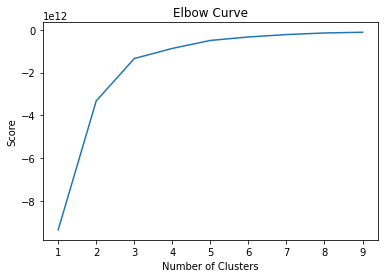

In [13]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [17]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

# Fit the k-means object to the data.

kmeans.fit(df1)

KMeans(n_clusters=4)

In [18]:
df1['clusters'] = kmeans.fit_predict(df1)

C:\Users\drmat\AppData\Local\Temp\ipykernel_13360\865444660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['clusters'] = kmeans.fit_predict(df1)


In [19]:
df1['clusters'].value_counts()

0    103
3     45
2     25
1      8
Name: clusters, dtype: int64

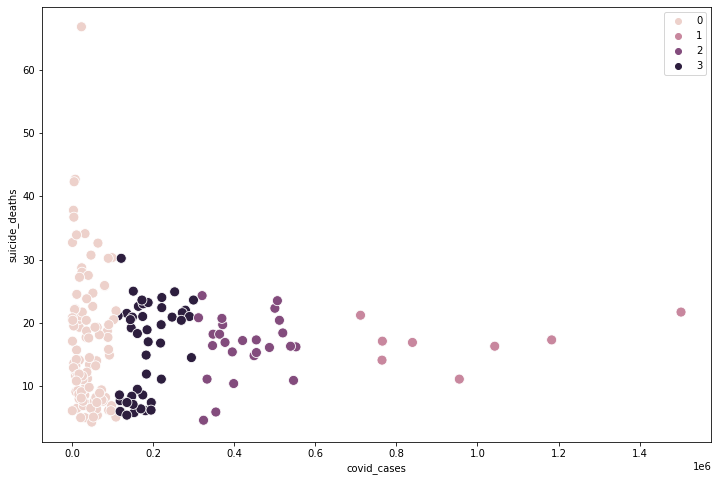

In [20]:
# Plot the clusters for the "Price per Unit" and "D.metro" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df1['covid_cases'], y=df1['suicide_deaths'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('covid_cases') # Label x-axis.
plt.ylabel('suicide_deaths') # Label y-axis.
plt.show()

In [21]:
plt.savefig(r"C:\Users\drmat\OneDrive\Documents\Career Foundry\COVID_Suicide\04 Analysis\ethnicity_cluster.png")

<Figure size 432x288 with 0 Axes>

In [22]:
df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'
df1.loc[df1['clusters'] == 1, 'cluster'] = 'purple'
df1.loc[df1['clusters'] == 0, 'cluster'] = 'pink'
df1.loc[df1['clusters'] == 3, 'cluster'] = 'black'

C:\Users\drmat\AppData\Local\Temp\ipykernel_13360\1556603742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.loc[df1['clusters'] == 2, 'cluster'] = 'dark purple'


In [23]:
df1.groupby('cluster').agg({'covid_cases':['mean', 'median'],'suicide_deaths':['mean', 'median']})

covid_cases           suicide_deaths       
                      mean    median           mean median
cluster                                                   
black        184739.822222  174540.0      16.048889   18.9
dark purple  422321.440000  398721.0      16.452000   16.9
pink          39760.699029   32291.0      16.552427   13.6
purple       970605.750000  897535.0      16.962500   17.0